## Cubic interpolation

### Considering unit interval [0,1]
Let's assume that we want to interpolate the value in between two given points. And we are not interested in linear interpolation, but would like to fit a polynomial of degree 3. 
Let's also assume that we want to interpolate for values $x \in [0,1]$, where f(0) and f(1) are given.
Since we are fitting curved function (a polynomial), we would like to preserve the smoothness on the borders.
I we would consider to fit a polynomial to more than 2 points. We would anyway fit a polynomial for every pair of points. To preserve the smoothness, the Cubic Hermit Spline (the thing, which we will compose below) takes into account the derivative at these two points. So, for fitting the cubic spline, we also assume that f'(0) and f'(1) are given. Either by someone mighty or compute using the finite difference. To compute the numeric derivative using finite distance we need to also know the value of the function outside [0,1].

The general equation for the polynomial of degree 3 is:

$$
    f(x) = ax^3 + bx^2 + cx + d
$$


So to fit f(x) we need to find the coefficients (a,b,c,d). For now we have 4 unknowns (a,b,c,d) and 2 equations (for f(0) and f(1)), which gives us underdefined system of linear equations. (Note: the unknowns are a,b,c and d and they are linear).

To compensate for this problem we take into account the first derivatives in given points f'(0) and f'(1).
 
$$
    f'(x) = 3ax^2 + 2bx + c
$$

Then we can obtain the following system of equations:   
\begin{eqnarray}
    f(0)  &=& d \\
    f(1)  &=& a + b + c +d \\
    f'(0) &=& c \\
    f'(1) &=& 3a + 2b + c
\end{eqnarray}

Solving for a, b, c, d:  
\begin{eqnarray}
    d &=& f(0) \\
    c &=& f'(0) \\
    b &=& 3f(1)-2f'(0) - 3f(0) - f'(1) \\
    a &=& -2f(1) + f'(0) + 2f(0) + f'(1)
\end{eqnarray}

Ok, found polynomial coefficients. But how do we know the derivatives given just f(0) and f(1)? This is a point in time where we need two extra points and the knowledge of finite differences :smile:

Let's consider the following example. We are given points $[-1,p_0]$, $[0,p_1]$, $[1,p_2]$ and $[2, p_3]$, where $x,f(x)]$. and we want to interpolate between $[0, p_1]$ and $[1, p_2]$.
Then,  
$
    f(0) = p_1 \\
    f(1) = p_2 \\
    f'(0) = (p_2 - p_0) / 1-(-1)  \\
    f'(1) = (p_3 - p_1) / 2  \\
$

the following holds:
\begin{eqnarray}
    a &=& 0.5 * (3p_1 - p_0 - 3p_2 + p_3) \\
    b &=& p_0 - 2.5p_1 + 2p_2 - 0.5p_3\\
    c &=& 0.5(p_2 - p_0) \\
    d &=& p_1
\end{eqnarray}

The final polynom then is:

\begin{equation}
 f(x) = 0.5 * (3p_1 - p_0 - 3p_2 + p_3) x^3 + (p_0 - 2.5p_1 + 2p_2 - 0.5p_3) x^2 + 0.5(p_2 - p_0) x + p_1 
\end{equation}

**Warning** This only works if your x is between 0 and 1 and all the points are located at distance 1 from each other in x axis.

Polynomial coefficients:  4.0 -6.5 0.5 5


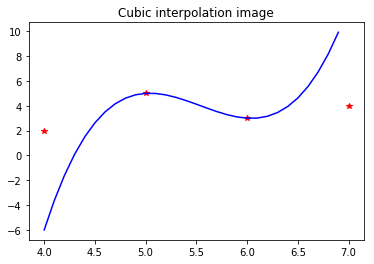

In [28]:
## Code for testing the cubic interpolation
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-1, 0, 1, 2])
fx = np.array([2, 5, 3,4])

a = 0.5 * (3 * fx[1] - fx[0] - 3*fx[2] + fx[3]);
b = fx[0] - 2.5 * fx[1] + 2 * fx[2] - 0.5 * fx[3];
c = 0.5 * (fx[2]- fx[0])
d = fx[1]
print("Polynomial coefficients: ",a,b,c,d)

x_t = np.arange(-1, 2,0.1);
f_x = a* np.power(x_t,3) + b*np.power(x_t,2) + c*x_t + d;

# fig=plt.figure(figsize=(16, 4), dpi= 80, facecolor='w', edgecolor='k')
fig = plt.figure(1)
plt.plot(x,fx, 'r*')
plt.plot(x_t,f_x, 'b-')
plt.title("Cubic interpolation image");

The last equation derived above is also confirmed by Wikipedia (https://en.wikipedia.org/wiki/Cubic_Hermite_spline) on the unit interval. If we rearrange, the $f(x)$ with respect to $p_0,p_1, p_2,p_3$ rather than $x$, we get exactly the formula from Wikipedia (Checked!).

**Side note** (for curious)
After the rearrangement the polynomial will have the following form:

$$
    f(x) = (2x^3 - 3x^2 + 1)f(0) + (x^3-2x^2+x)f'(0) + (-2x^3+3x^2)f(1) + (x^3-x^2)f'(1)
$$

The "coeffients" in this case are called Hermite basis functions and have further properties (not relevant here).

$$
    f(x) = h_{00}f(0) + h_{01}f'(0) + h_{10}f(1) + h_{11}f'(1)
$$

### Arbitrary interval

Ok. What if the x coordinates are not 0 and 1? Since, all the nice equations above hold only if we compute f'(0) and f'(1).
I guess, there 2 cases to consider:
    1) Your points are at 1 distance but shifted somewhere. Then the solution would be to shift the result.
    2) The points are not equidistant or the distance is not 1. Then one would need to take distance into account for computing derivatives.